# Lesson 2: Image Segmentation

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
    ```
    !pip install ultralytics torch
    ```

In [1]:
!pip install ultralytics torch

#!pip install -r requirements.txt


### Load the sample image

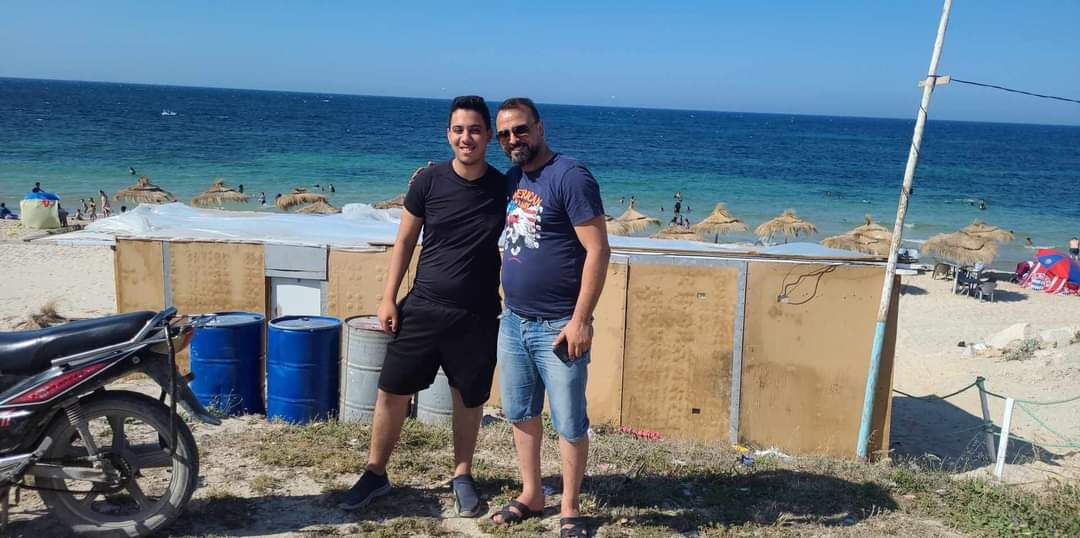

In [51]:
from PIL import Image
raw_image = Image.open("amine.jpg")
raw_image

>Note: the images referenced in this notebook have already been uploaded to the Jupyter directory, in this classroom, for your convenience. For further details, please refer to the **Appendix** section located at the end of the lessons.

* Resize the image.

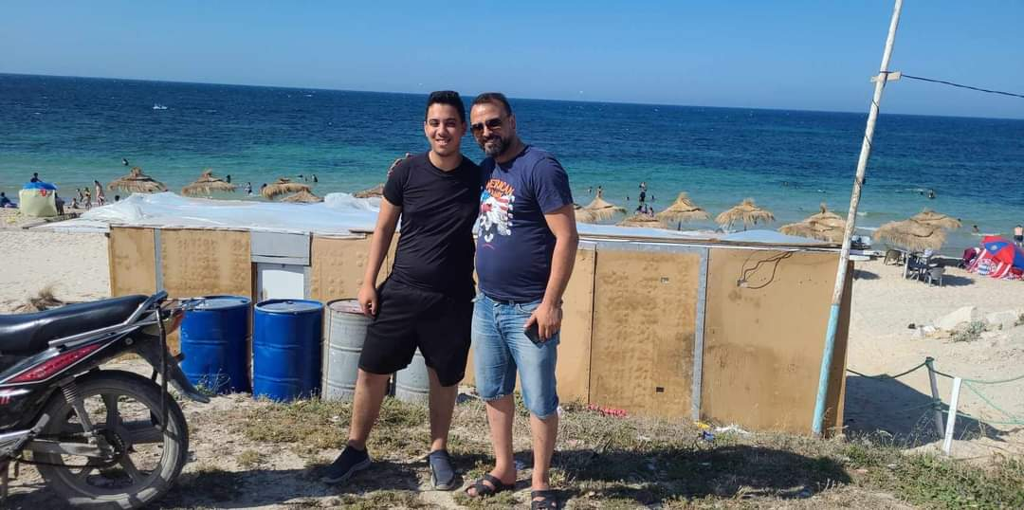

In [52]:
from utils import resize_image
resized_image = resize_image(raw_image, input_size=1024)
resized_image

### Import and prepare the model

In [53]:
import torch

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

Info about [torch](https://pytorch.org/).

In [55]:
from ultralytics import YOLO
model = YOLO('./FastSAM.pt')

Info about ['FastSAM'](https://docs.ultralytics.com/models/fast-sam/)

### Use the model

>Note: ```utils``` is an additional file containing the methods that have been already developed for you to be used in this classroom. 
For further details, please refer to the **Appendix** section located at the end of the lessons.

In [56]:
from utils import show_points_on_image

In [60]:
# Define the coordinates for the point in the image
# [x_axis, y_axis]
input_points = [ [450, 200 ] ]

In [61]:
input_labels = [1] # positive point

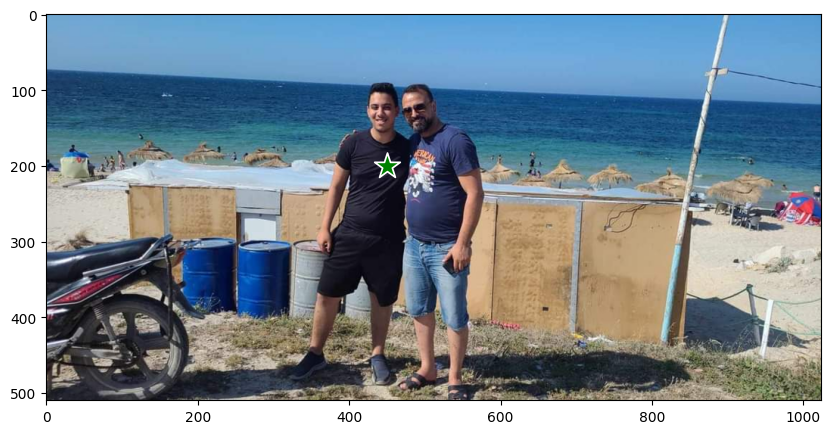

In [62]:
# Function written in the utils file
show_points_on_image(resized_image, input_points)

In [63]:
# Run the model
results = model(resized_image, device=device, retina_masks=True)


0: 512x1024 78 objects, 3464.0ms
Speed: 12.6ms preprocess, 3464.0ms inference, 360.3ms postprocess per image at shape (1, 3, 512, 1024)


* Filter the mask based on the point defined before.

In [64]:
from utils import format_results, point_prompt

In [65]:
results = format_results(results[0], 0)

In [66]:
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)

In [67]:
from utils import show_masks_on_image

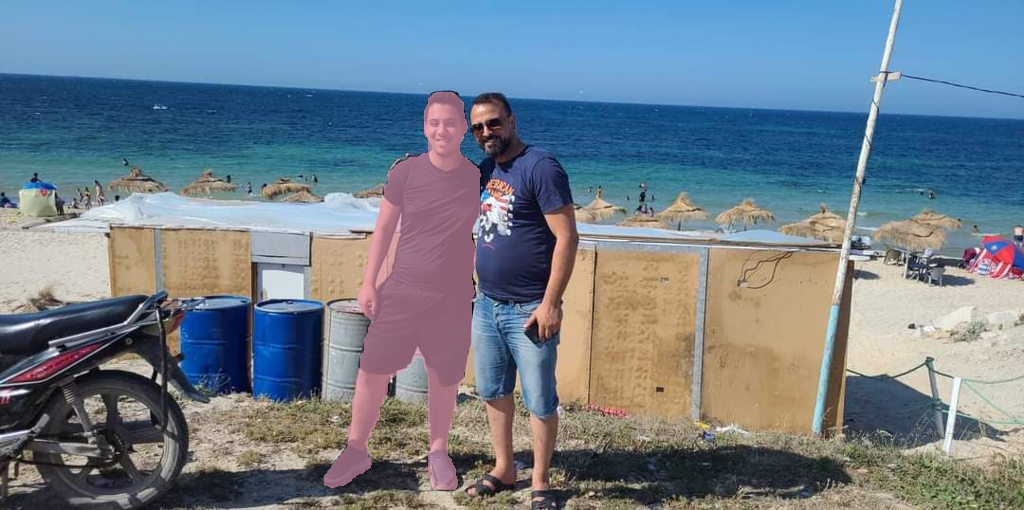

In [68]:
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])

* Define 'semantic masks' - two points to be masked.

In [72]:
# Specify two points in the same model
# [x_axis, y_axis]
input_points = [ [450, 200 ], [500, 200] ]

In [73]:
# Specify both points as "positive prompt"
input_labels = [1 , 1] # both positive points

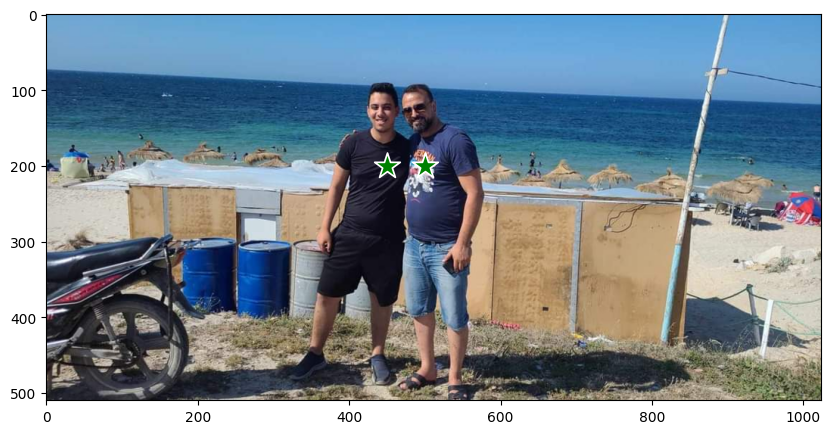

In [74]:
# Visualize the points defined before
show_points_on_image(resized_image, input_points)

In [75]:
# Run the model
results = model(resized_image, device=device, retina_masks=True)


0: 512x1024 78 objects, 3334.6ms
Speed: 6.7ms preprocess, 3334.6ms inference, 373.4ms postprocess per image at shape (1, 3, 512, 1024)


In [76]:
results = format_results(results[0], 0)

In [77]:
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)

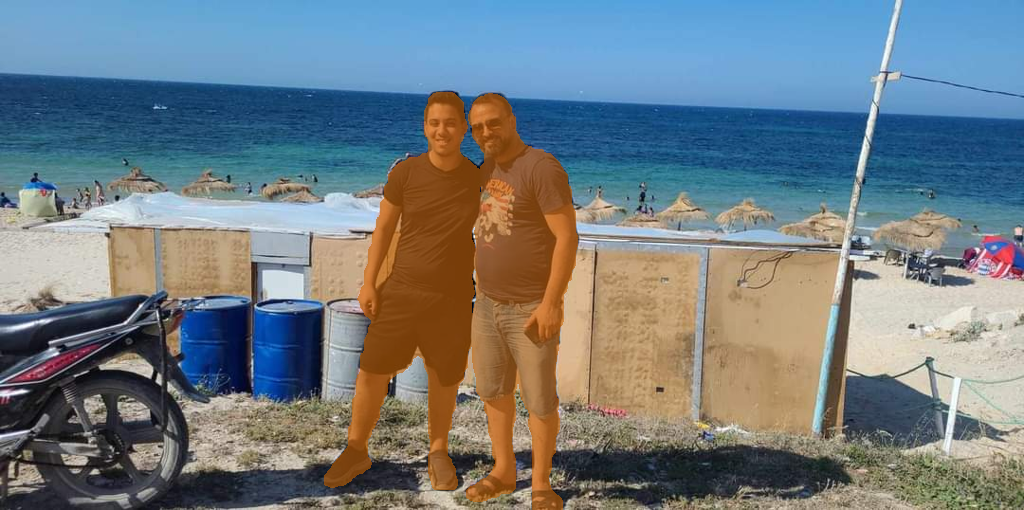

In [78]:
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])

>Note: Please note that the results obtained from running this notebook may vary slightly from those demonstrated by the instructor in the video. 

* Identify subsections of the image by adding a **negative prompt**.

In [116]:
# Define the coordinates for the points to be masked
# [x_axis, y_axis]
input_points = [ [430, 280], [435, 120]]

In [117]:
input_labels = [1, 0] # positive prompt, negative prompt

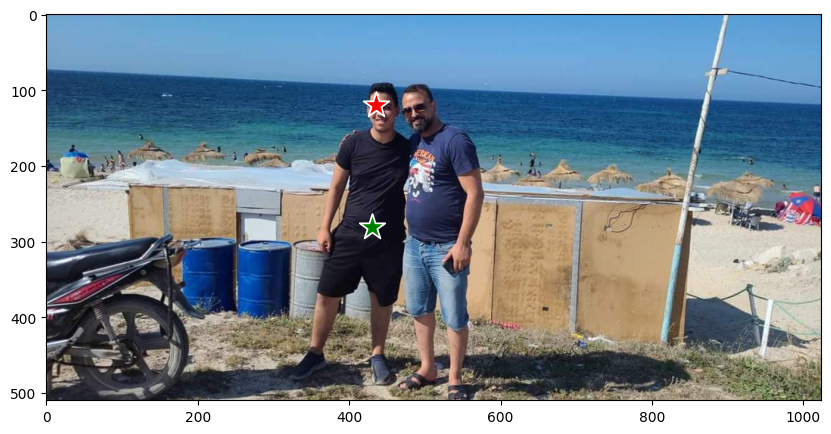

In [118]:
# Visualize the points defined before
show_points_on_image(resized_image, input_points, input_labels)

>Note: From the image above, the red star indicates the negative prompt and the green star the positive prompt.

In [121]:
# Run the model
results = model(resized_image, device=device, retina_masks=True)


0: 512x1024 78 objects, 3160.9ms
Speed: 8.5ms preprocess, 3160.9ms inference, 270.8ms postprocess per image at shape (1, 3, 512, 1024)


In [122]:
results = format_results(results[0], 0)

In [123]:
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)

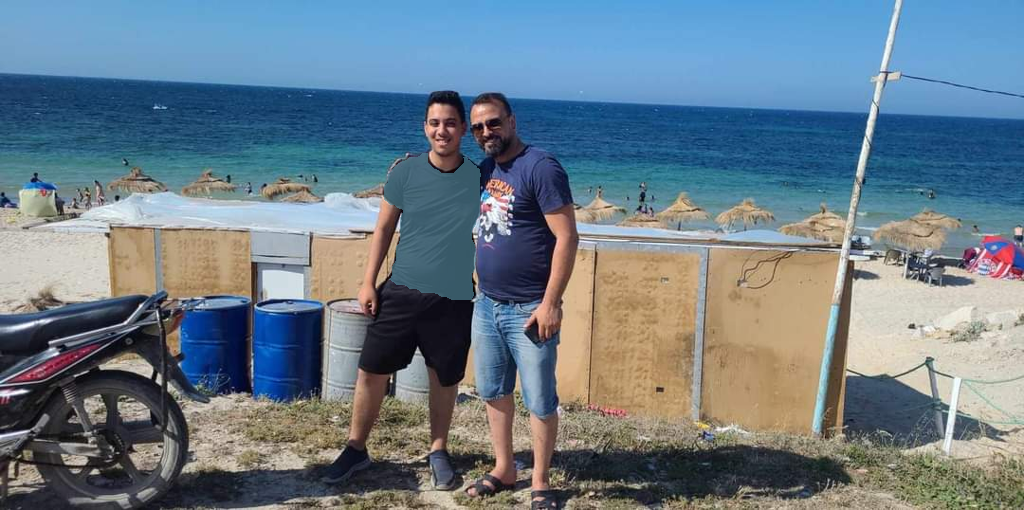

In [124]:
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])

>Note: From the image above, only the jacket, from the dog in the left, was segmented, so, it is following the command given by the positive prompt!

### Prompting with bounding boxes

In [125]:
from utils import box_prompt

In [157]:
# Set the coordinates for the box
# [xmin, ymin, xmax, ymax]
input_boxes = [450, 50, 600, 600]

In [158]:
from utils import show_boxes_on_image

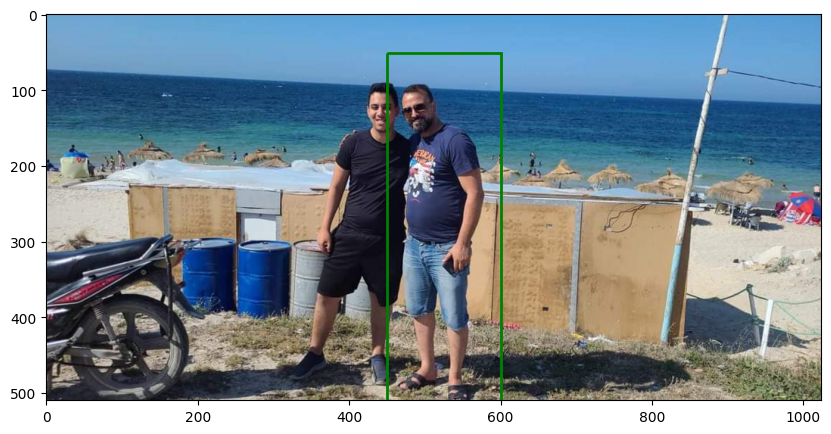

In [159]:
# Visualize the bounding box defined with the coordinates above
show_boxes_on_image(resized_image, [input_boxes])

* Now, try to isolate the mask from the total output of the model.

In [160]:
from utils import box_prompt

In [161]:
results = model(resized_image, device=device, retina_masks=True)


0: 512x1024 78 objects, 3599.9ms
Speed: 9.5ms preprocess, 3599.9ms inference, 270.0ms postprocess per image at shape (1, 3, 512, 1024)


In [162]:
#Generate the masks
masks = results[0].masks.data

In [163]:
masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [164]:
# Convert to True/False booleans
masks = masks > 0

In [165]:
masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [166]:
masks, _ = box_prompt(masks, input_boxes)

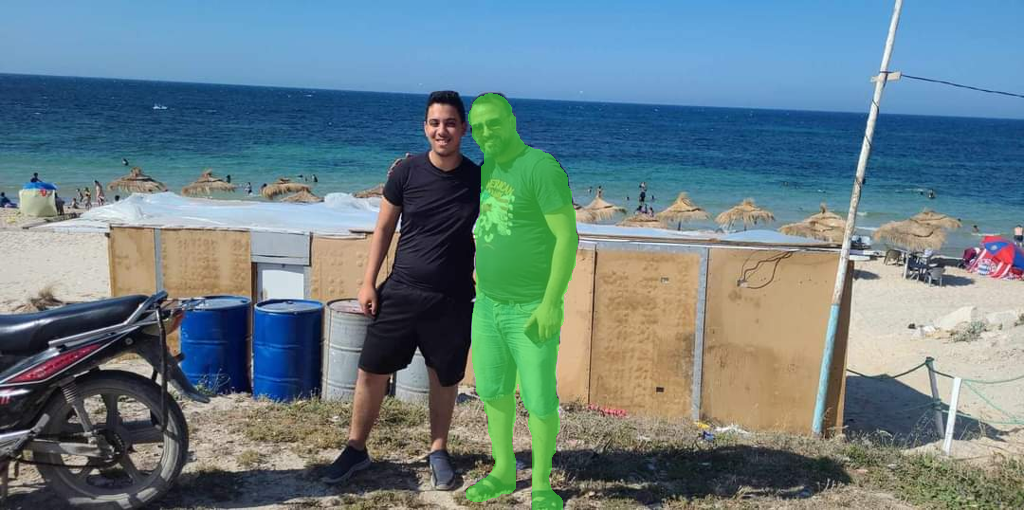

In [167]:
# Visualize the masks
show_masks_on_image(resized_image, [masks])

In [168]:
# Print the segmentation mask, but in its raw format
masks

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [169]:
# To visualize, import matplotlib
from matplotlib import pyplot as plt

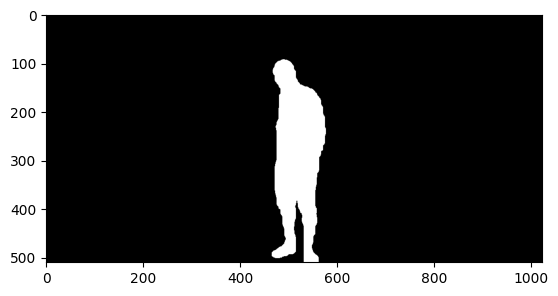

In [170]:
# Plot the binary mask as an image
plt.imshow(masks, cmap='gray')

### Additional Resources

* For more on how to use Comet for experiment tracking, check out this [Quickstart Guide](https://colab.research.google.com/drive/1jj9BgsFApkqnpPMLCHSDH-5MoL_bjvYq?usp=sharing) and the [Comet Docs](https://www.comet.com/docs/v2/).
* This course was based off a set of two blog articles from Comet. Explore them here for more on how to use newer versions of Stable Diffusion in this pipeline, additional tricks to improve your inpainting results, and a breakdown of the pipeline architecture:
  * [SAM + Stable Diffusion for Text-to-Image Inpainting](https://www.comet.com/site/blog/sam-stable-diffusion-for-text-to-image-inpainting/)
  * [Image Inpainting for SDXL 1.0 Base Model + Refiner](https://www.comet.com/site/blog/image-inpainting-for-sdxl-1-0-base-refiner/)
